# **02_modeling.ipynb**
# **SOAL 3 – MODELING & EVALUATION**
# **UAS Penambangan Data Ganjil 2025/2026**
# **Topik: Prediksi Harga Saham IDX**


# CLONE DATASET IDX


In [2]:
!git clone https://github.com/wildangunawan/Dataset-Saham-IDX.git

Cloning into 'Dataset-Saham-IDX'...
remote: Enumerating objects: 85165, done.
remote: Counting objects: 100% (1654/1654), done.
remote: Compressing objects: 100% (401/401), done.
remote: Total 85165 (delta 1349), reused 1253 (delta 1253), pack-reused 83511 (from 3)
Receiving objects: 100% (85165/85165), 104.28 MiB | 16.79 MiB/s, done.
Resolving deltas: 100% (81782/81782), done.
Updating files: 100% (1033/1033), done.


LOAD SEMUA CSV + DROPDOWN SAHAM + LOAD DATA DARI DROPDOWN

In [3]:
import os
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

dataset_path = 'Dataset-Saham-IDX/Saham/Semua'
files = sorted([f for f in os.listdir(dataset_path) if f.endswith('.csv')])

dropdown = widgets.Dropdown(
    options=files,
    description='Pilih Saham:',
    disabled=False,
)

display(dropdown)

def load_stock(change):
    clear_output(wait=True)
    display(dropdown)

    selected = dropdown.value
    print("Saham terpilih:", selected)

    file_path = os.path.join(dataset_path, selected)
    global df
    df = pd.read_csv(file_path)

    display(df.head())
    print("\nShape:", df.shape)
    display(df.info())

dropdown.observe(load_stock, names='value')


Dropdown(description='Pilih Saham:', index=95, options=('AADI.csv', 'AALI.csv', 'ABBA.csv', 'ABDA.csv', 'ABMM.…

Saham terpilih: BBCA.csv


,date,previous,open_price,first_trade,high,low,close,change,volume,value,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
0,2019-07-29,30975.0,31100.0,31100.0,31150.0,30800.0,30950.0,-25.0,13701900.0,4.246726e+11,...,1250400.0,2.440846e+10,2.440846e+10,2.440846e+10,4199100.0,3782800.0,NaN,6607083.0,2.056272e+11,39.0
1,2019-07-30,30950.0,31025.0,31025.0,31250.0,30950.0,31100.0,150.0,7645100.0,2.375243e+11,...,1900.0,2.440846e+10,2.440846e+10,2.440846e+10,3859500.0,4278300.0,NaN,8274494.0,2.570538e+11,44.0
2,2019-07-31,31100.0,30950.0,31100.0,31200.0,30900.0,30950.0,-150.0,12825800.0,3.977603e+11,...,1223000.0,2.440846e+10,2.440846e+10,2.440846e+10,7957300.0,8680200.0,NaN,10022093.0,3.113416e+11,57.0
3,2019-08-01,30950.0,30950.0,30950.0,31350.0,30925.0,31050.0,100.0,15645600.0,4.865419e+11,...,19500.0,2.440846e+10,2.440846e+10,2.440846e+10,6683700.0,13290800.0,NaN,7091288.0,2.210745e+11,35.0
4,2019-08-02,31050.0,30800.0,30825.0,31025.0,30800.0,30825.0,-225.0,12597900.0,3.892295e+11,...,1027000.0,2.440846e+10,2.440846e+10,2.440846e+10,9195000.0,2639100.0,NaN,2103060.0,6.523255e+10,32.0



Shape: (1355, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1355 non-null   object 
 1   previous               1355 non-null   float64
 2   open_price             1355 non-null   float64
 3   first_trade            1355 non-null   float64
 4   high                   1355 non-null   float64
 5   low                    1355 non-null   float64
 6   close                  1355 non-null   float64
 7   change                 1355 non-null   float64
 8   volume                 1355 non-null   float64
 9   value                  1355 non-null   float64
 10  frequency              1355 non-null   float64
 11  index_individual       1355 non-null   float64
 12  offer                  1355 non-null   float64
 13  offer_volume           1355 non-null   float64
 14  bid                    1355 non-null 

None

# ===========================================

# PREPROCESSING MINIMAL (KHUSUS MODELING)

# ===========================================

BASIC CLEANING

In [17]:
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'])

df = df.sort_values('date')
df = df.fillna(method='ffill')

/tmp/ipython-input-2135292507.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


# =========================

# FEATURE ENGINEERING

# =========================

In [18]:
# Moving average
df['ma_5'] = df['close'].rolling(5).mean()
df['ma_20'] = df['close'].rolling(20).mean()

# Return
df['return'] = df['close'].pct_change()

# Volatility
df['volatility'] = df['return'].rolling(10).std()

# Market pressure
df['bid_offer_ratio'] = df['bid_volume'] / (df['offer_volume'] + 1)

# Foreign flow
df['foreign_flow'] = df['foreign_buy'] - df['foreign_sell']

df = df.fillna(method='ffill')

/tmp/ipython-input-2152202213.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


# =========================

# FEATURE SELECTION

# =========================

In [19]:
features = [
    'previous','open_price','first_trade','high','low','volume','value','frequency',
    'offer','offer_volume','bid','bid_volume',
    'listed_shares','tradeble_shares','weight_for_index',
    'foreign_buy','foreign_sell',
    'ma_5','ma_20','volatility','bid_offer_ratio','foreign_flow'
]

X = df[features]
y = df['close']

# =========================

# SCALING

# =========================

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# =========================

# SPLITTING DATA (TIME-SERIES SAFE)

# =========================

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, shuffle=False
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, shuffle=False
)

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

Train: (948, 22)
Val: (203, 22)
Test: (204, 22)


# **=========================**

# **MODEL 1 — RANDOM FOREST**

# **=========================**

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(
    rf, rf_params,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

print("RF Best Params:", rf_grid.best_params_)

RF Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


# **=========================**

# **MODEL 2 — XGBOOST**

# **=========================**

In [23]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

xgb_grid = GridSearchCV(
    xgb, xgb_params,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_

print("XGB Best Params:", xgb_grid.best_params_)

XGB Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


# **=========================**

# **EVALUATION**

# **=========================**

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate(model, X, y):
    pred = model.predict(X)
    r2 = r2_score(y, pred)
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, pred)
    return r2, mse, rmse, mae, pred

rf_r2, rf_mse, rf_rmse, rf_mae, rf_pred = evaluate(rf_best, X_test, y_test)
xgb_r2, xgb_mse, xgb_rmse, xgb_mae, xgb_pred = evaluate(xgb_best, X_test, y_test)

# **=========================**

# **TABEL PERBANDINGAN MODEL**

# **=========================**

In [25]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'R2': [rf_r2, xgb_r2],
    'MSE': [rf_mse, xgb_mse],
    'RMSE': [rf_rmse, xgb_rmse],
    'MAE': [rf_mae, xgb_mae]
})

results

,Model,R2,MSE,RMSE,MAE
0,Random Forest,-2.590138,7.988851e+05,893.803741,769.898897
1,XGBoost,-85.306338,1.920507e+07,4382.359183,4276.234696


# **=========================**

# **VISUALISASI EVALUASI**

# **=========================**

ACTUAL VS PRED

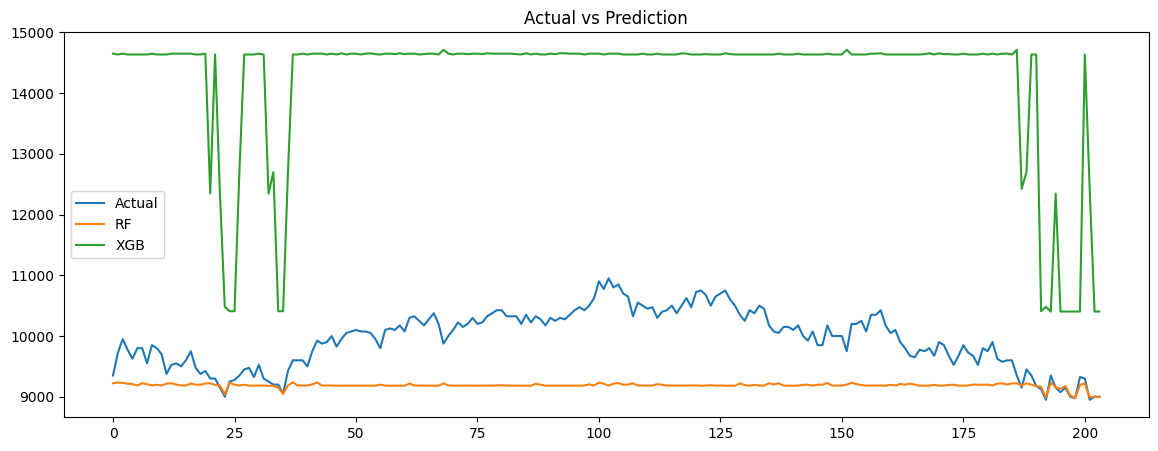

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_pred, label='RF')
plt.plot(xgb_pred, label='XGB')
plt.legend()
plt.title('Actual vs Prediction')
plt.show()

# **=========================**

# **FEATURE IMPORTANCE (RF)**

# **=========================**

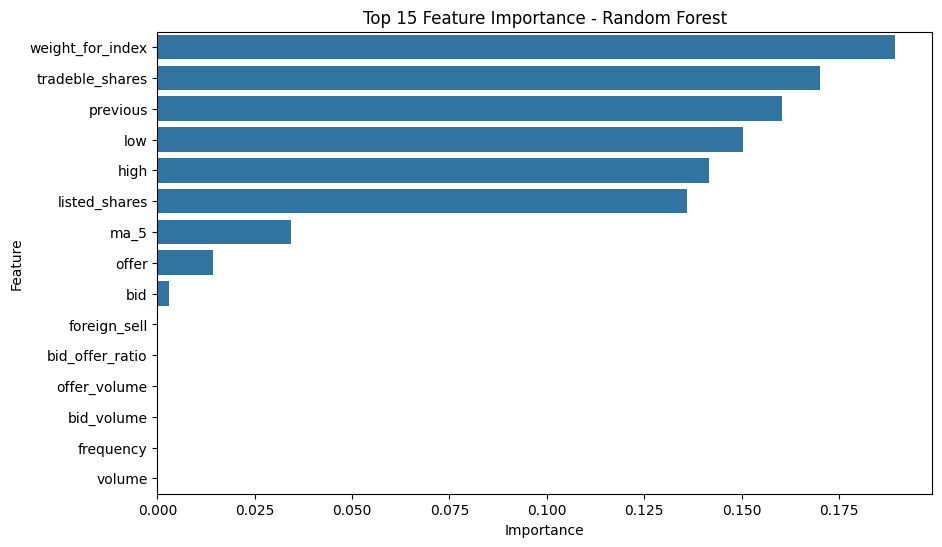

In [28]:
import seaborn as sns
importances = rf_best.feature_importances_
fi = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=fi.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importance - Random Forest')
plt.show()

# **=========================**

# **SHAP INTERPRETATION (XGB)**

# **=========================**

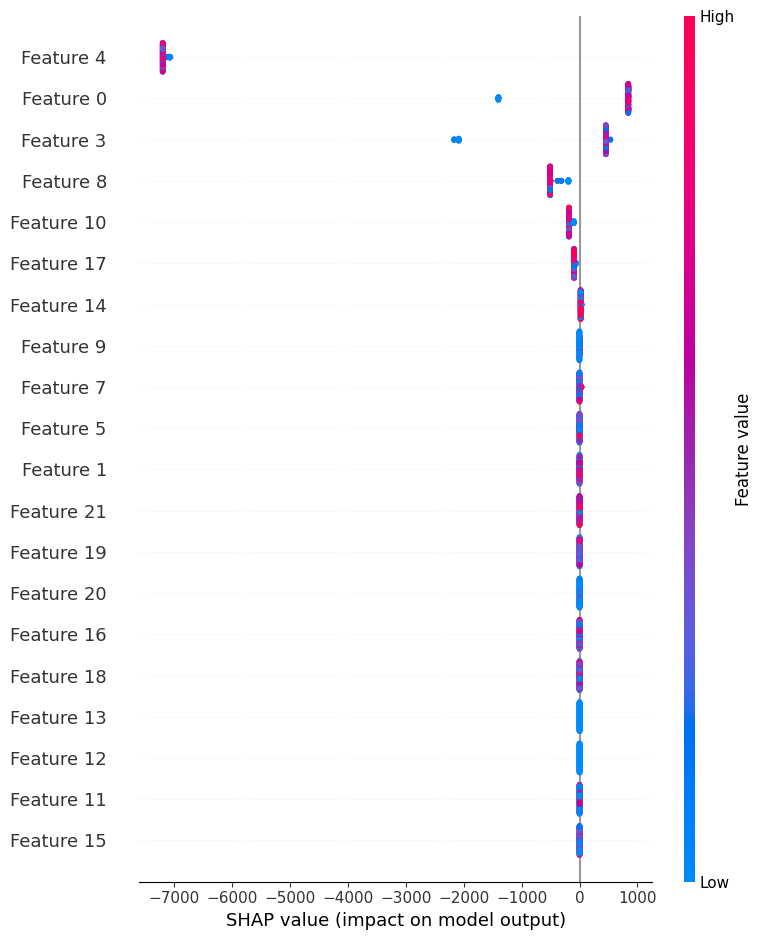

In [29]:
import shap

explainer = shap.Explainer(xgb_best)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

# **=========================**

# **SAVE MODEL**

# **=========================**

In [30]:
import joblib

best_model = xgb_best if xgb_rmse < rf_rmse else rf_best
joblib.dump(best_model, 'best_model.pkl')

if xgb_rmse < rf_rmse:
    print("Model terbaik: XGBoost")
else:
    print("Model terbaik: Random Forest")

Model terbaik: Random Forest
